# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

## Graficas linea, area, histograma...

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
%ls

 00_00_binder.ipynb                     Clase4_Graficas.ipynb
 00_00_primer_pasos.ipynb               coches.csv
 01_01_data_types.ipynb                 cwurData.csv
 01_02_read_iloc_unique_groupby.ipynb   data.csv
 02_00_data_wrangling.ipynb             headbrain.csv
 02_01_null_display.ipynb               heart.csv
 02_02_basic_math.ipynb                 mic2.xlsx
'A5 histogramas y boxplots.ipynb'       mic.xlsx
 adult.csv                              movies.csv
 airline_data.csv                       nhanes_2015_2016.csv
 antropometria00.csv                   'Pivot_tables_act (1).ipynb'
 antropometria-dataset.csv              pokemon.csv
 Book3.csv                              README.md
 Canada.xlsx                            requirements.txt
 Cartwheeldata.csv                      sample_pivot.csv
 census.csv                             tips.csv
 Clase_2_2.ipynb                        weight-height.csv
 Clase_2.ipynb


In [5]:
df = pd.read_excel('Canada.xlsx',
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20), #se utiliza pq el inicio del documento no lo queremos
                   skipfooter = 2, # igual que lo de arriba pero al final
                   engine = 'openpyxl'
                  )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descripcion de base de datos
### esta es una base de datos sobre la inmigracion a canada y explica la llegada de estos inmigrantes de 1980 hasta el 2013 con el pais de origen de cada uno

In [6]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [7]:
df.drop(['Type',    'Coverage',        'AREA',
          'REG', 'DEV',
           'DevName', 'Unnamed: 43' ,'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis = 1, inplace = True) # así se quitan columnas no deseadas

In [8]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [9]:
# el nombre de la columna es preferible que este en string para no confundirlo con datos
df.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent',  'RegName' : 'Region'} , inplace = True)
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

In [10]:
all(isinstance(x,str) for x in df.columns)

False

In [11]:
df.columns = list(map(str, df.columns)) #cambia todas las variables a str
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [12]:
all(isinstance(x,str) for x in df.columns)

True

In [13]:
df.loc[:,'1980':'2013']
df.head(2)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0


In [14]:
df['Total'] = df.loc[:,'1980':'2013'].sum(axis = 1)
df.head(2)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


# Pregunta de inv 1
### ¿Cuantas personas llegaron a canada desde 1980 hasta 2013 desde japon?

In [15]:
df.iloc[:1, :] #para afganistasn

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0


In [16]:
df.set_index('Country', inplace = True) # para cambiar el indice
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [17]:
years = list(map(str, range(1980, 2014)))
df.loc['Japan', 'Total']

27707.0

In [18]:
df.loc['Japan', years]

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

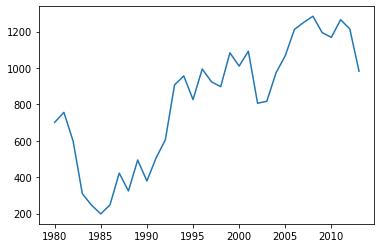

In [19]:
df.loc['Japan',years].plot()

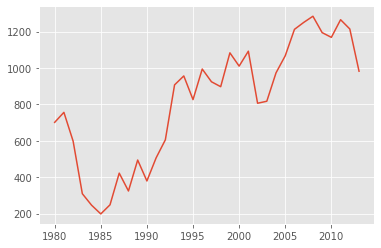

In [20]:
import matplotlib as mpl
mpl.style.use('ggplot')
df.loc['Japan',years].plot()

In [21]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Preg de inv 3
### cuantas personas llegaron desde china e india

In [22]:
ndf = df.loc[['India','China'], years].transpose()
ndf.head()

Country,India,China
1980,8880.0,5123.0
1981,8670.0,6682.0
1982,8147.0,3308.0
1983,7338.0,1863.0
1984,5704.0,1527.0


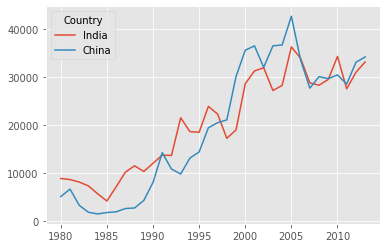

In [23]:
ndf.plot()

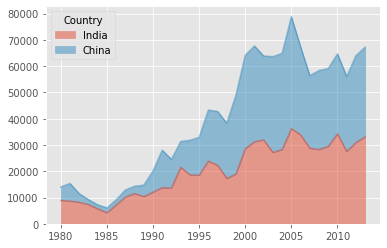

In [24]:
ndf.plot(kind = 'area', alpha = 0.5)

## como seris un comportsmirnyo de numero de inmigrantes de los 5 paises...

In [25]:
top_cinco = df.sort_values(['Total'], 
                   ascending = False,
                    ).head(7)
top_cinco

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,152075.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6924212.0
India,Asia,Southern Asia,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,17304.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Philippines,Asia,South-Eastern Asia,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


In [26]:
top_cinco.drop(['Total','Unknown'], axis = 0, inplace = True) # axis 0 es renglones, axis 1 es columnas; inplace = true es para remplazar
top_cinco  

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


In [32]:
top_cinco = top_cinco.transpose()
top_cinco

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
Continent,Asia,Asia,Europe,Asia,Asia
Region,Southern Asia,Eastern Asia,Northern Europe,South-Eastern Asia,Southern Asia
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
